In [1]:
import pandas as pd
import numpy as np
import re

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [67]:
pd.set_option('display.max_columns', 30)

In [68]:
data_stat=pd.read_csv('./sharks_clean.csv',  encoding='ANSI', sep=';')

data_stat.head()

,case_number,date,type,country,location,sex,fatal,investigator_or_source,pdf,href_formula,href,case_number.a,case_number.b,original_order,unnamed.a,unnamed.b,years,area,activity,name,age,injury,time,species
0,2912,2018-06-25,BOAT,UNITED STATES OF AMERICA,"OCEANSIDE, SAN DIEGO COUNTY",F,N,"R. COLLIER, GSAF",2018.06.25-WOLFE.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.06.25,2018.06.25,6303.0,UNKNOWN,UNKNOWN,2018,CALIFORNIA,PADDLING,JULIE WOLFE,57,NO INJURY,18H00,WHITE
1,2911,2018-06-08,UNPROVOKED,AUSTRALIA,ARRAWARRA HEADLAND,M,N,"B. MYATT, GSAF",2018.06.08-ARRAWARRA.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.06.08,2018.06.08,6300.0,UNKNOWN,UNKNOWN,2018,NEW SOUTH WALES,SURFING,OTHER,UNKNOWN,MINOR INJURY,UNKNOWN,UNKNOWN
2,2910,2018-06-04,PROVOKED,MEXICO,LA TICLA,M,N,A .KIPPER,2018.06.04-RAMOS.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.06.04,2018.06.04,6299.0,UNKNOWN,UNKNOWN,2018,COLIMA,DIVING,GUSTAVO RAMOS,UNKNOWN,LACERATION,UNKNOWN,TIGER
3,2909,2018-06-03,UNPROVOKED,BRAZIL,"PIEDADE BEACH, RECIFE",M,Y,"DIARIO DE PERNAMBUCO, 6/4/2018",2018.06.03.A-DASILVA.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.06.03.A,2018.06.03.A,6297.0,UNKNOWN,UNKNOWN,2018,PERNAMBUCO,SWIM,JOSE ERNESTO DA SILVA,18,FATAL,UNKNOWN,TIGER
4,2908,2018-05-27,UNPROVOKED,UNITED STATES OF AMERICA,"LIGHHOUSE POINT PARK, PONCE INLET, VOLUSIA COUNTY",M,N,"K. MCMURRAY, TRACKINGSHARKS.COM",2018.05.27-PONCE.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,2018.05.27,2018.05.27,6296.0,UNKNOWN,UNKNOWN,2018,FLORIDA,FISHING,OTHER,52,MINOR INJURY,UNKNOWN,LEMON


In [22]:
data= data_stat

In [69]:
data2=data.groupby("country")[("country", "sex")].count()
data2

C:\Users\David MC\AppData\Local\Temp\ipykernel_15796\815873872.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2=data.groupby("country")[("country", "sex")].count()


,country,sex
country,,
AMERICAN SAMOA,2,2
ANTIGUA AND BARBUDA,1,1
ARGENTINA,1,1
AUSTRALIA,731,731
BAHAMAS,39,39
...,...,...
URUGUAY,1,1
VANUATU,2,2
VENEZUELA,3,3


In [73]:
data3=data.groupby(['sex'])[("sex")].count()

data3

sex
F           339
M          2338
UNKNOWN     235
Name: sex, dtype: int64

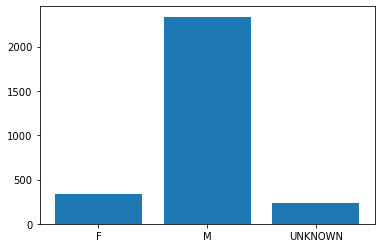

In [81]:
#plt.figure(figsize=(10,6))

y_pos = np.arange(len(data3))

# Create bars
plt.bar(y_pos, data3)

# Create names on the x-axis
plt.xticks(y_pos, data3.index)

# Show graphic
plt.show()

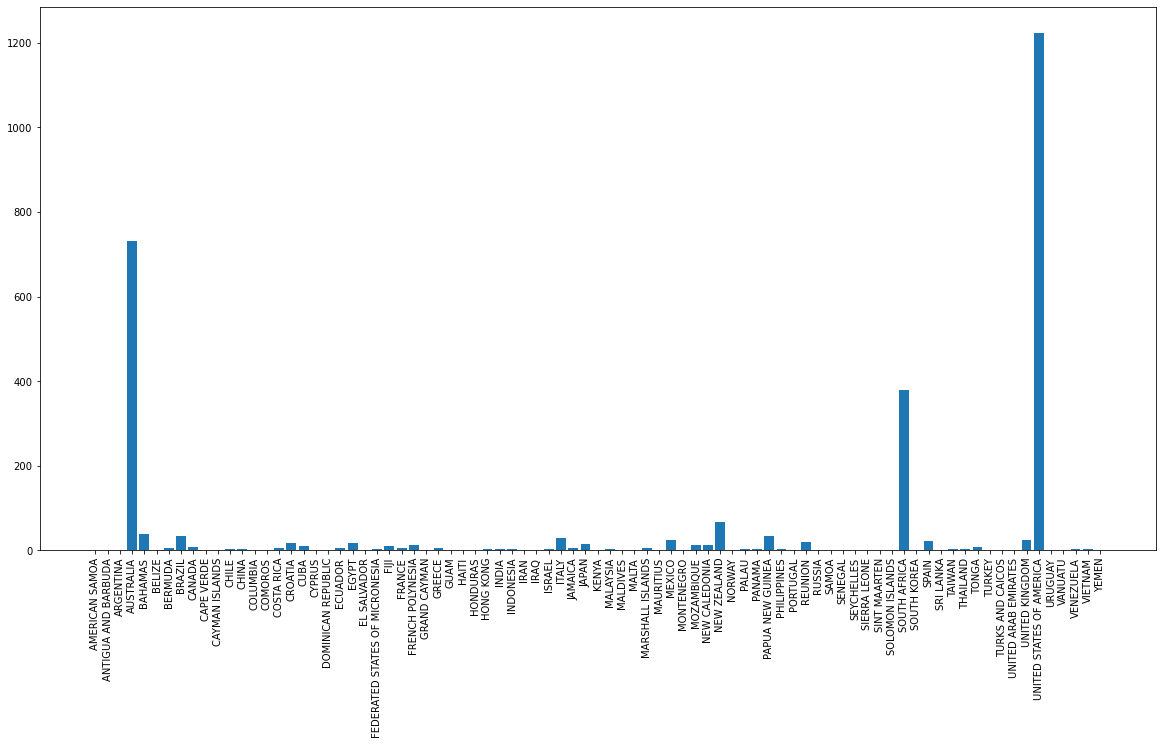

In [125]:
plt.figure(figsize=(20,10))

y_pos = np.arange(len(data2.country))

# Create bars
plt.bar(y_pos, data2.country)

# Create names on the x-axis
plt.xticks(y_pos, data2.index)
plt.xticks(rotation = 90)

# Show graphic
plt.show()

In [147]:
data4=data.groupby(['species'])[('species','age')].count()

data4

C:\Users\David MC\AppData\Local\Temp\ipykernel_15796\1229005622.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data4=data.groupby(['species'])[('species','age')].count()


,species,age
species,,
BASKING,6,6
BLACK,90,90
BLUE,40,40
BOA,8,8
BROADNOSE,3,3
BROWN,3,3
BULL,132,132
CARIBBEAN,12,12
COOKIECUTTER,1,1


In [153]:
data4.drop(data4[data4['species'] >= 1300].index, inplace = True)

data4=data4.drop('age']

#data= data.drop('years', axis=1)

data4

KeyError: "['age'] not found in axis"

TypeError: only size-1 arrays can be converted to Python scalars

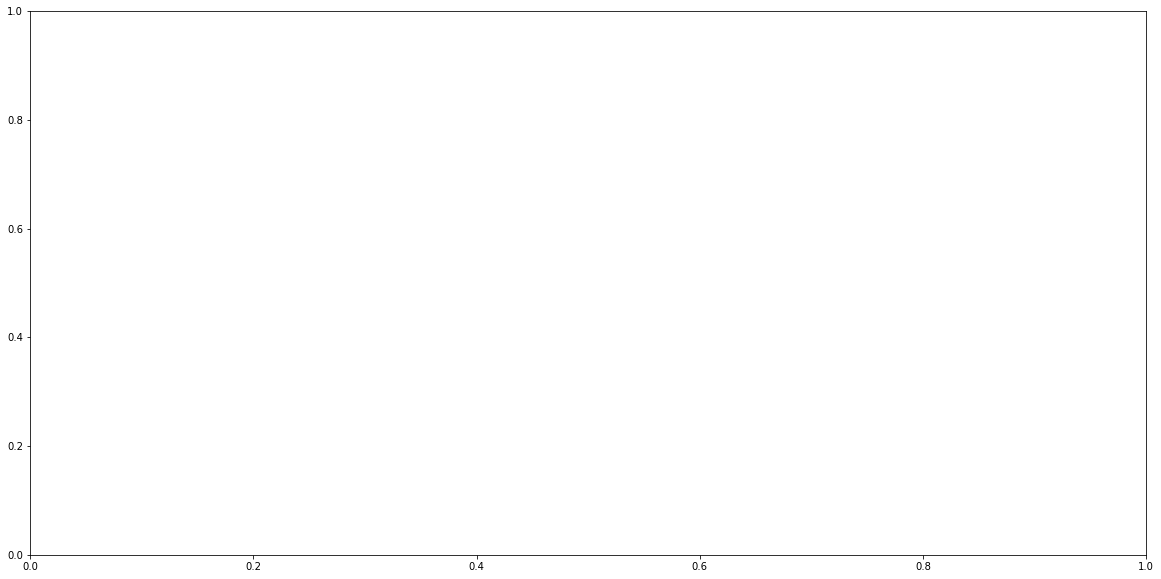

In [152]:
plt.figure(figsize=(20,10))

y_pos = np.arange(len(data4))

# Create bars
plt.bar(y_pos, data4)

# Create names on the x-axis
plt.xticks(y_pos, data4.index, rotation = 45)

# Show graphic
plt.show()

In [113]:
data4=data[['sex','fatal']].copy()

data4['unos']=1


pd.pivot_table(data4, values='unos', index='sex', columns='fatal', aggfunc='count')

fatal,N,UNKNOWN,Y
sex,,,
F,245,45,49
M,1753,294,291
UNKNOWN,169,56,10


In [131]:
data10=pd.crosstab(index=data.age, columns='count')

data10

col_0,count
age,
10,34
11,18
12,37
13,47
14,49
...,...
77,2
8,13
84,1


In [133]:
data10.sort_values(by=['count'], inplace=True)

data10.drop(data10[data10['count'] >= 500].index, inplace = True)

data10

col_0,count
age,
84,1
75,1
74,1
3,1
64,1
...,...
21,72
20,75
17,80


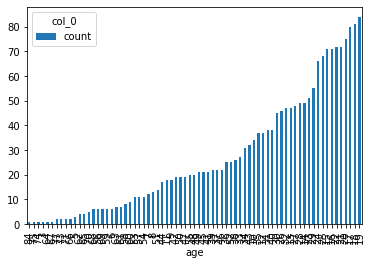

In [144]:


barplot = data10.plot.bar(rot=90)

TypeError: only size-1 arrays can be converted to Python scalars

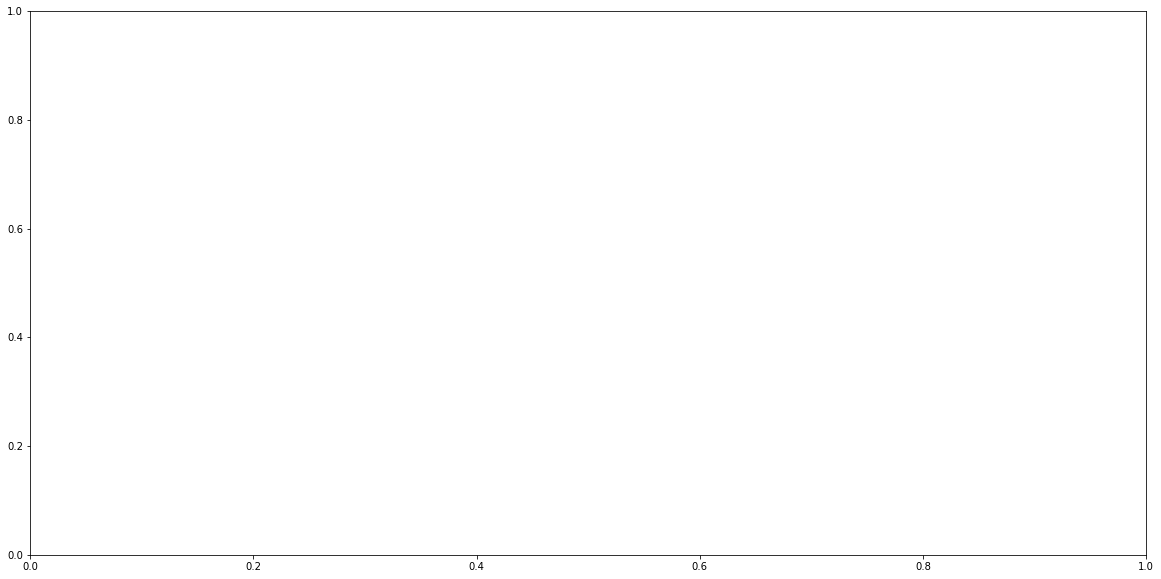

In [138]:
plt.figure(figsize=(20,10))

y_pos = np.arange(len(data10))

# Create bars
plt.bar(y_pos, data10)

# Create names on the x-axis
plt.xticks(y_pos, data10.index, rotation = 45,)

# Show graphic
plt.show()